In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from copy import deepcopy 

from helper import State, Simulator

  <h1><b>World description</b></h1>

  <h3>Actions</h3>
  <p>Our world is a grid world. An agent can move the world travelling in four main directions, so four actions are possible:</p>
  <ul>
    <li>0 (up)</li>
    <li>1 (right)</li>
    <li>2 (down)</li>
    <li>3 (left)</li>
  </ul>
  <p>Each action moves us to the corresponding state. If it is impossible to be moved, we are staying in the same state. There is also a terminal state (marked red). Reaching a terminal state ends the episode.</p>

  <h3>States</h3>
  <p>A state is a location of the agent. A standard way to describe the state is by using an instance of a State class. Such an object has two properties: state.row and state.col that are describing the position of the agent. Both rows and cols are counted from 0, so the upper left corner corresponds to (0, 0) state. Another way of describing a state is by using a tuple (row, col). Such a format is also accepted by methods implemented in a simulator.</p>

  <h3>Rewards</h3>
  <p>For each move a negative reward Reward = -1 is granted. Additionally, for entering each state a reward associated with this state is granted.</p>

  <h3>Simulator Description</h3>
  <p>A main goal of a simulator are as follows:</p>
  <ul>
    <li>Store the data about the world</li>
    <li>Store the current policy</li>
    <li>Store the current value function</li>
    <li>Facilitate RL-related operations</li>
  </ul>

  <h5>Properties:</h5>
  <ul>
    <li><strong>world</strong> - numpy.array with the world. The numbers correspond to the rewards for reaching each state</li>
    <li><strong>policy</strong> - numpy.array with policy. Policy is always deterministic. The numbers represent specific actions: 0 (up), 1 (right), 2 (down), 3 (left)</li>
    <li><strong>values</strong> - numpy.array with the state-value function for each state</li>
    <li><strong>reward</strong> - additional reward granted for performing each action</li>
    <li><strong>terminal</strong> - a terminal state. It is an instance of the State class.</li>
  </ul>

  <h5>Methods:</h5>
  <ul>
    <li><strong>move</strong> - Returns a state that is the result of an action.</li>
    <li><strong>getReward</strong> - Returns the reward for entering a specific state (location).</li>
    <li><strong>getValue</strong> - Returns a Value function for a determined state (location).</li>
    <li><strong>getPolicy</strong> - Returns a policy for a determined state (location).</li>
    <li><strong>setValue</strong> - Sets a Value function for a determined state (location).</li>
    <li><strong>setPolicy</strong> - Sets a policy for a determined state (location).</li>
    <li><strong>plot</strong> - Visualizes the world, value function and policy.</li>
  </ul>


<h1><b>🤖 Environment</h1></b>

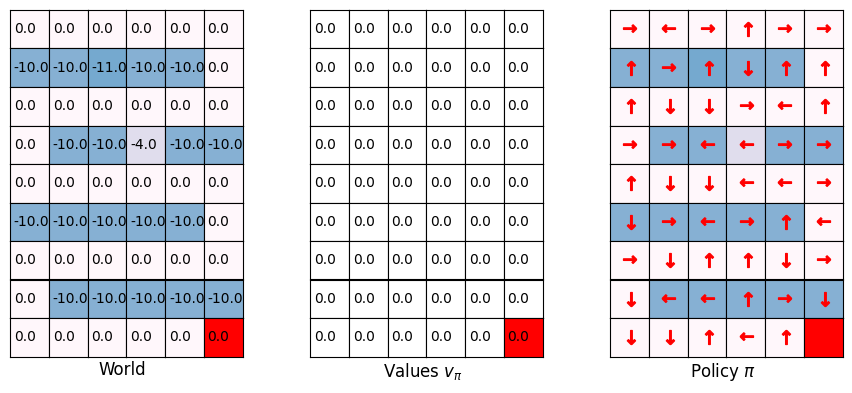

In [4]:
world = -np.array([
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 11, 10, 10,  0],
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10,  4, 10, 10],
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 10, 10, 10,  0],    
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10, 10, 10, 10],
    [ 0,  0, 0,   0,  0,  0],
])


sim = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

sim.plot()

<h1><b>🤖 Policy evaulation function</h1></b>

In [3]:
def value_function(gamma= 0.9): 

  for i in range(world.shape[0]):
    for j in range(world.shape[1]): 
          state = State((i,j))
          if state != sim.terminal:
            next_state = sim.move(state)
            reward = sim.getReward(next_state) #moving according to the policy and calculate the expected reward of the next state
            v = reward + gamma * sim.getValue(next_state)
            sim.setValue(state, v) #entering this value into the value function matrix

<h1><b>🤖 Policy improvement function</h1></b>

In [5]:
def policy_improvement(gamma = 0.9):

  for i in range(world.shape[0]):
    for j in range(world.shape[1]):
      state = State((i,j))
      old_action = sim.getPolicy(state) 
      if state != sim.terminal: #wykluczamy terminal state
        rewards = []
        for direction in range(4):
            next_move = sim.move(state, direction) #sprawdzamy wszystkie kierunki
            if next_move is None:  #dla każdego kierunku sprawdzamy czy nie wychodzi poza mape
                reward = -1 * sim.getReward(state)
                next_move = state
            else:
                reward = sim.getReward(next_move)
            value = reward + gamma * sim.getValue(next_move)
            rewards.append(value) 
        highest_index = np.argmax(rewards)
        sim.setPolicy(state, highest_index) 

<h1><b>🤖 Policy Iteration</h1></b>

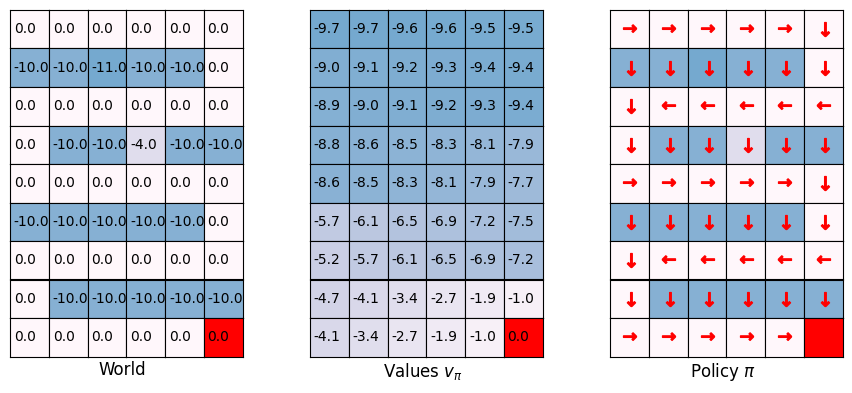

In [6]:
for i in range(1000):
  value_function()
  policy_improvement()
sim.plot()